In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.DataFrame()
filenames = glob("DataGovSG/*_rainfall.csv")
for filename in filenames:
    other_df = pd.read_csv(filename)
    other_df = other_df.rename(columns={"value": "rainfall"})
    other_df["timestamp_sgt"] = other_df["timestamp_sgt"].astype("datetime64[ns]")
    df = df.append(other_df,ignore_index=True)
another_df = df.set_index("station_id").sort_index()

In [3]:
locations = pd.read_csv("StationLocations.csv")
locations=locations.rename(columns={"Lon (d)":"longitude","Lat (d)":"latitude"})
#locations

In [5]:
nnon_zero = another_df.sort_values("timestamp_sgt",ascending=True).reset_index().set_index("timestamp_sgt",drop=False)
times = nnon_zero.index
nnon_zero = nnon_zero.set_index([times.year,times.month,times.day,times.hour])
nnon_zero.index.names = ["year","month","day","hour"]
nnon_zero

station_id  rainfall       timestamp_sgt
year month day hour                                         
2016 12    2   21         S121       0.0 2016-12-02 21:49:59
               21         S109       0.0 2016-12-02 21:49:59
               21          S08       0.0 2016-12-02 21:49:59
               21         S120       0.0 2016-12-02 21:49:59
               21          S11       0.0 2016-12-02 21:49:59
               21          S81       0.0 2016-12-02 21:49:59
               21         S112       0.0 2016-12-02 21:49:59
               21          S69       0.0 2016-12-02 21:49:59
               21          S66       0.0 2016-12-02 21:49:59
               21          S77       0.0 2016-12-02 21:49:59
               21          S89       0.0 2016-12-02 21:49:59
               21         S119       0.0 2016-12-02 21:49:59
               21         S114       0.0 2016-12-02 21:49:59
               21         S123       0.0 2016-12-02 21:49:59
               21          S79       0.0 2016-12-02 21:49:59
               21          S88       0.0 2016-12-02 21:49:59
               21          S55       0.0 2016-12-02 21:49:59
               21          S71       0.0 2016-12-02 21:49:59
               21         S118       0.0 2016-12-02 21:49:59
               21          S46       0.0 2016-12-02 21:49:59
               21          S96       0.0 2016-12-02 21:49:59
               21          S50       0.0 2016-12-02 21:49:59
               21          S92       0.0 2016-12-02 21:49:59
               21          S36       0.0 2016-12-02 21:49:59
               21         S108       0.0 2016-12-02 21:49:59
               21          S35       0.0 2016-12-02 21:49:59
               21          S33       0.0 2016-12-02 21:49:59
               21         S117       0.0 2016-12-02 21:49:59
               21          S91       0.0 2016-12-02 21:49:59
               21         S104       0.0 2016-12-02 21:49:59
...                        ...       ...                 ...
2017 4     30  23          S07       0.0 2017-04-30 23:55:00
               23         S120       0.0 2017-04-30 23:55:00
               23          S33       0.0 2017-04-30 23:55:00
               23          S24       0.0 2017-04-30 23:55:00
               23         S118       0.0 2017-04-30 23:55:00
               23         S104       0.0 2017-04-30 23:55:00
               23          S64       0.0 2017-04-30 23:55:00
               23          S78       0.0 2017-04-30 23:55:00
               23          S89       0.0 2017-04-30 23:55:00
               23         S123       0.0 2017-04-30 23:55:00
               23          S71       0.0 2017-04-30 23:55:00
               23          S66       0.0 2017-04-30 23:55:00
               23         S102       0.0 2017-04-30 23:55:00
               23          S46       0.0 2017-04-30 23:55:00
               23         S115       0.0 2017-04-30 23:55:00
               23          S81       0.0 2017-04-30 23:55:00
               23          S79       0.0 2017-04-30 23:55:00
               23          S92       0.0 2017-04-30 23:55:00
               23         S107       0.0 2017-04-30 23:55:00
               23         S109       0.0 2017-04-30 23:55:00
               23          S61       0.0 2017-04-30 23:55:00
               23          S35       0.0 2017-04-30 23:55:00
               23         S117       0.0 2017-04-30 23:55:00
               23         S116       0.0 2017-04-30 23:55:00
               23         S122       0.0 2017-04-30 23:55:00
               23          S29       0.0 2017-04-30 23:55:00
               23         S113       0.0 2017-04-30 23:55:00
               23         S101       0.0 2017-04-30 23:55:00
               23          S50       0.0 2017-04-30 23:55:00
               23         S100       0.0 2017-04-30 23:55:00

[2294406 rows x 3 columns]

In [6]:
nnon_zero = nnon_zero.groupby(["year","month","day","hour","station_id"]).sum()
nnon_zero.reset_index(inplace=True)
nnon_zero.set_index(["year","month","day","hour"],inplace=True)
nnon_zero

station_id  rainfall
year month day hour                     
2016 12    2   21          S06       0.0
               21          S07       0.0
               21          S08       0.0
               21         S100       0.0
               21         S101       0.0
               21         S102       0.0
               21         S104       0.0
               21         S107       0.0
               21         S108       0.0
               21         S109       0.0
               21          S11       0.0
               21         S110       0.0
               21         S112       0.0
               21         S113       0.0
               21         S114       0.0
               21         S115       0.0
               21         S116       0.0
               21         S117       0.0
               21         S118       0.0
               21         S119       0.0
               21         S120       0.0
               21         S121       0.0
               21         S122       0.0
               21         S123       0.0
               21          S24       0.0
               21         S24B       0.0
               21          S29       0.0
               21          S33       0.0
               21          S35       0.0
               21          S36       0.0
...                        ...       ...
2017 4     30  23         S118       0.0
               23         S119       0.0
               23         S120       0.0
               23         S122       0.0
               23         S123       0.0
               23          S24       0.0
               23          S29       0.0
               23          S33       0.0
               23          S35       0.0
               23          S40       0.0
               23          S43       0.0
               23          S44       0.0
               23          S46       0.0
               23          S50       0.0
               23          S55       0.0
               23          S61       0.0
               23          S63       0.0
               23          S64       0.0
               23          S66       0.0
               23          S71       0.0
               23          S77       0.0
               23          S78       0.0
               23          S79       0.0
               23          S81       0.0
               23          S84       0.0
               23          S88       0.0
               23          S89       0.0
               23         S900       0.0
               23          S92       0.0
               23          S94       0.0

[193157 rows x 2 columns]

In [21]:
non_zero = nnon_zero.set_index("station_id",append=True)
non_zero

rainfall
year month day hour station_id          
2016 12    2   21   S06              0.0
                    S07              0.0
                    S08              0.0
                    S100             0.0
                    S101             0.0
                    S102             0.0
                    S104             0.0
                    S107             0.0
                    S108             0.0
                    S109             0.0
                    S11              0.0
                    S110             0.0
                    S112             0.0
                    S113             0.0
                    S114             0.0
                    S115             0.0
                    S116             0.0
                    S117             0.0
                    S118             0.0
                    S119             0.0
                    S120             0.0
                    S121             0.0
                    S122             0.0
                    S123             0.0
                    S24              0.0
                    S24B             0.0
                    S29              0.0
                    S33              0.0
                    S35              0.0
                    S36              0.0
...                                  ...
2017 4     30  23   S118             0.0
                    S119             0.0
                    S120             0.0
                    S122             0.0
                    S123             0.0
                    S24              0.0
                    S29              0.0
                    S33              0.0
                    S35              0.0
                    S40              0.0
                    S43              0.0
                    S44              0.0
                    S46              0.0
                    S50              0.0
                    S55              0.0
                    S61              0.0
                    S63              0.0
                    S64              0.0
                    S66              0.0
                    S71              0.0
                    S77              0.0
                    S78              0.0
                    S79              0.0
                    S81              0.0
                    S84              0.0
                    S88              0.0
                    S89              0.0
                    S900             0.0
                    S92              0.0
                    S94              0.0

[193157 rows x 1 columns]

In [22]:
non_zero = non_zero.unstack(level=-1)
non_zero

rainfall                                                 \
station_id               S06  S07  S08  S100 S101 S102 S103  S104 S106 S107   
year month day hour                                                           
2016 12    2   21        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  NaN  0.0   
               22        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               23        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
           3   0         0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               1         0.8  2.2  0.0   0.0  0.0  0.4  NaN   0.0  0.0  0.0   
               2         0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.8  0.0   
               3         0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               4         0.0  0.0  0.0   0.0  0.0  0.8  NaN   0.0  0.2  0.0   
               5         3.0  4.4  1.4   0.0  0.0  3.4  NaN   0.0  0.2  0.0   
               6         4.2  0.8  1.0   0.0  0.2  0.2  NaN   0.0  0.4  0.0   
               7         0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               8         0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               9         0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               10        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               11        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               12        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               13        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               14        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               15        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               16        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               17        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               18        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               19        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               20        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               21        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               22        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               23        0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
           4   0         0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               1         0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               2         0.0  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
...                      ...  ...  ...   ...  ...  ...  ...   ...  ...  ...   
2017 4     29  18        NaN  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               19        NaN  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               20        NaN  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               21        NaN  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               22        NaN  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               23        NaN  0.0  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
           30  0         NaN  NaN  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               1         NaN  NaN  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               2         NaN  NaN  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               3         NaN  NaN  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               4         NaN  NaN  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               5         NaN  NaN  0.0   0.0  0.0  0.0  NaN   0.0  0.0  0.0   
               6         NaN  NaN  0.0   0.0  0.0  0.0  NaN   0.0  NaN  0.0   
               7         NaN  0.0  0.0   0.0  0.0  0.0  NaN   0.0  NaN  0.0   
               8         NaN  0.0  0.0   0.0  0.0  0.0  NaN   0.0  NaN  0.0   
               9         NaN  0.0  0.0   0.0  0.0  0.0  NaN   0.0  NaN  0.0   
               10        NaN  0.0  0.0   0.0  0.0  0.0  NaN   0.0  NaN

In [23]:
correlations = non_zero.corr()
correlations

rainfall                                          \
station_id                S06       S07       S08      S100      S101   
         station_id                                                     
rainfall S06         1.000000  0.563639  0.439448  0.207687  0.150125   
         S07         0.563639  1.000000  0.753864  0.372174  0.203222   
         S08         0.439448  0.753864  1.000000  0.439699  0.291128   
         S100        0.207687  0.372174  0.439699  1.000000  0.398639   
         S101        0.150125  0.203222  0.291128  0.398639  1.000000   
         S102        0.089133  0.078784  0.075797  0.068941  0.235343   
         S103             NaN       NaN       NaN       NaN       NaN   
         S104        0.342388  0.265041  0.355227  0.544660  0.304850   
         S106        0.375180  0.210449  0.223377  0.139178  0.156622   
         S107        0.507849  0.343392  0.334766  0.167548  0.160542   
         S108        0.299951  0.456851  0.339922  0.227953  0.311413   
         S109        0.638253  0.516704  0.750085  0.271556  0.210982   
         S11         0.145059  0.177968  0.175628  0.305862  0.687208   
         S110        0.826421  0.609560  0.553411  0.310263  0.202641   
         S112        0.236482  0.216651  0.281984  0.677999  0.234004   
         S113        0.490837  0.500690  0.427748  0.193590  0.149807   
         S114        0.191224  0.334863  0.311098  0.622236  0.616649   
         S115        0.126150  0.152025  0.127373  0.131579  0.279565   
         S116        0.198468  0.268361  0.280117  0.188418  0.440910   
         S117        0.097543  0.161780  0.086360  0.132381  0.258153   
         S118        0.313584  0.538604  0.347183  0.272276  0.269377   
         S119        0.305680  0.520616  0.347123  0.260653  0.303820   
         S120        0.355664  0.628271  0.539554  0.297740  0.287710   
         S121        0.230604  0.320378  0.272903  0.444870  0.768143   
         S122        0.490178  0.350452  0.487752  0.415499  0.181825   
         S123        0.588442  0.747338  0.546061  0.262110  0.218257   
         S24         0.440533  0.254106  0.213320  0.135693  0.172935   
         S24B             NaN       NaN       NaN       NaN       NaN   
         S29         0.547535  0.212410  0.249409  0.172808  0.163742   
         S33         0.157697  0.177550  0.173273  0.183746  0.441454   
         S35         0.181569  0.340864  0.432602  0.383794  0.580776   
         S36         0.606504  0.866894  0.676538  0.378490  0.199398   
         S40         0.290143  0.422631  0.495177  0.667109  0.239549   
         S43         0.750052  0.702716  0.518860  0.235659  0.136975   
         S44         0.286946  0.281685  0.275731  0.219316  0.591155   
         S46         0.437126  0.813016  0.693774  0.331398  0.372911   
         S50         0.309608  0.502479  0.541356  0.347614  0.495415   
         S55         0.798247  0.417897  0.428356  0.180633  0.154876   
         S60         0.143369  0.270215  0.183571  0.162836  0.113220   
         S61         0.655963  0.503222  0.403712  0.214275  0.172920   
         S63         0.240542  0.249365  0.277002  0.323677  0.628133   
         S64         0.285180  0.489376  0.462016  0.718940  0.418231   
         S66         0.238540  0.236455  0.278237  0.744543  0.292606   
         S69         0.383040  0.699433  0.779126  0.522715  0.366084   
         S71         0.253966  0.374062  0.363503  0.216165  0.420076   
         S72              NaN       NaN       NaN       NaN       NaN   
         S77         0.307960  0.461343  0.382863  0.243561  0.379061   
         S78         0.491155  0.630249  0.504068  0.265447  0.222238   
         S79         0.318147  0.551111  0.359938  0.286009  0.307237   
         S81         0.644842  0.289346  0.309131  0.156045  0.151587   
         S84         0.555794  0.158030  0.190314  0.128106  0.068457   
         S88         0.580436  0.905064  0.727449  0.388444  0.185004   
      

In [24]:
correlations.reset_index(inplace=True)
del correlations["level_0"]
correlations.set_index("station_id", inplace=True)
correlations.columns = correlations.columns.droplevel()
correlations

station_id,S06,S07,S08,S100,S101,S102,S103,S104,S106,S107,...,S84,S88,S89,S90,S900,S91,S92,S94,S96,S97
station_id,,,,,,,,,,,,,,,,,,,,,
S06,1.000000,0.563639,0.439448,0.207687,0.150125,0.089133,NaN,0.342388,0.375180,0.507849,...,0.555794,0.580436,0.112078,0.413084,0.625716,0.521624,0.265112,0.656722,0.273712,NaN
S07,0.563639,1.000000,0.753864,0.372174,0.203222,0.078784,NaN,0.265041,0.210449,0.343392,...,0.158030,0.905064,0.155596,0.753948,0.378288,0.374025,0.359920,0.236498,0.225882,NaN
S08,0.439448,0.753864,1.000000,0.439699,0.291128,0.075797,NaN,0.355227,0.223377,0.334766,...,0.190314,0.727449,0.120958,0.630762,0.457619,0.447940,0.349778,0.242720,0.203506,NaN
S100,0.207687,0.372174,0.439699,1.000000,0.398639,0.068941,NaN,0.544660,0.139178,0.167548,...,0.128106,0.388444,0.111890,0.291369,0.181200,0.454643,0.176338,0.135063,0.108394,NaN
S101,0.150125,0.203222,0.291128,0.398639,1.000000,0.235343,NaN,0.304850,0.156622,0.160542,...,0.068457,0.185004,0.356689,0.231339,0.124394,0.209728,0.389669,0.119425,0.175885,NaN
S102,0.089133,0.078784,0.075797,0.068941,0.235343,1.000000,NaN,0.061918,0.028376,0.127905,...,0.066751,0.106213,0.427275,0.176663,0.048117,0.033325,0.452381,0.057738,0.050311,NaN
S103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S104,0.342388,0.265041,0.355227,0.544660,0.304850,0.061918,NaN,1.000000,0.227122,0.277919,...,0.274091,0.272052,0.085875,0.183869,0.411376,0.689234,0.196491,0.254413,0.150832,NaN
S106,0.375180,0.210449,0.223377,0.139178,0.156622,0.028376,NaN,0.227122,1.000000,0.384820,...,0.391352,0.220749,0.110397,0.203709,0.330509,0.260057,0.201650,0.512411,0.373382,NaN


In [31]:
correlations = correlations.dropna(axis=[0,1],how="all")
correlations

station_id,S06,S07,S08,S100,S101,S102,S104,S106,S107,S108,...,S81,S84,S88,S89,S90,S900,S91,S92,S94,S96
station_id,,,,,,,,,,,,,,,,,,,,,
S06,1.000000,0.563639,0.439448,0.207687,0.150125,0.089133,0.342388,0.375180,0.507849,0.299951,...,0.644842,0.555794,0.580436,0.112078,0.413084,0.625716,0.521624,0.265112,0.656722,0.273712
S07,0.563639,1.000000,0.753864,0.372174,0.203222,0.078784,0.265041,0.210449,0.343392,0.456851,...,0.289346,0.158030,0.905064,0.155596,0.753948,0.378288,0.374025,0.359920,0.236498,0.225882
S08,0.439448,0.753864,1.000000,0.439699,0.291128,0.075797,0.355227,0.223377,0.334766,0.339922,...,0.309131,0.190314,0.727449,0.120958,0.630762,0.457619,0.447940,0.349778,0.242720,0.203506
S100,0.207687,0.372174,0.439699,1.000000,0.398639,0.068941,0.544660,0.139178,0.167548,0.227953,...,0.156045,0.128106,0.388444,0.111890,0.291369,0.181200,0.454643,0.176338,0.135063,0.108394
S101,0.150125,0.203222,0.291128,0.398639,1.000000,0.235343,0.304850,0.156622,0.160542,0.311413,...,0.151587,0.068457,0.185004,0.356689,0.231339,0.124394,0.209728,0.389669,0.119425,0.175885
S102,0.089133,0.078784,0.075797,0.068941,0.235343,1.000000,0.061918,0.028376,0.127905,0.391167,...,0.046855,0.066751,0.106213,0.427275,0.176663,0.048117,0.033325,0.452381,0.057738,0.050311
S104,0.342388,0.265041,0.355227,0.544660,0.304850,0.061918,1.000000,0.227122,0.277919,0.246771,...,0.295080,0.274091,0.272052,0.085875,0.183869,0.411376,0.689234,0.196491,0.254413,0.150832
S106,0.375180,0.210449,0.223377,0.139178,0.156622,0.028376,0.227122,1.000000,0.384820,0.183662,...,0.572048,0.391352,0.220749,0.110397,0.203709,0.330509,0.260057,0.201650,0.512411,0.373382
S107,0.507849,0.343392,0.334766,0.167548,0.160542,0.127905,0.277919,0.384820,1.000000,0.392937,...,0.468932,0.556177,0.343195,0.079910,0.361923,0.309153,0.371047,0.349427,0.539225,0.511489


In [34]:
all_stations = list(correlations.index.unique())
len(all_stations)

56

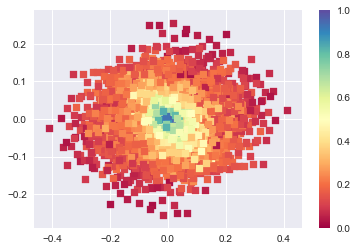

In [35]:
#neww_locations = locations.set_index("station_id",drop=True)
#temp = nnon_zero.reset_index()
#print(temp)
#all_stations = temp["station_id"].values
for station1 in all_stations:
    new_locations = locations.set_index("station_id",drop=True)
    new_locations["longitude"] = new_locations["longitude"]-new_locations.loc[station1,"longitude"]
    new_locations["latitude"] = new_locations["latitude"]-new_locations.loc[station1,"latitude"]
    for station2 in all_stations:
        if station2 != station1:
            x=new_locations.loc[station2,"longitude"]
            y=new_locations.loc[station2,"latitude"]
            z=correlations.loc[station1,station2]
            plt.scatter(x,y,c=z,vmin=0, vmax=1, marker="s",cmap="Spectral")
plt.colorbar()
plt.show()

In [38]:
time = pd.to_datetime("2017-04-30 23:55:00")
time = time.strftime("%Y-%m-%d %H")
time

'2017-04-30 23'

In [7]:
indices = nnon_zero.index.unique().values

In [8]:
stand_dev = nnon_zero.groupby("station_id").std()
stand_dev

,rainfall
station_id,
S06,2.098856
S07,2.419157
S08,2.212507
S100,1.774601
S101,1.793078
S102,1.550494
S103,0.000000
S104,1.943961
S106,1.672822


In [9]:
mean = nnon_zero.groupby("station_id").mean()
mean

,rainfall
station_id,
S06,0.318866
S07,0.341012
S08,0.298667
S100,0.258493
S101,0.276958
S102,0.171631
S103,0.000000
S104,0.306346
S106,0.251326


In [10]:
paired_hours = pd.DataFrame()
all_stations = list(nnon_zero["station_id"].unique())
print(all_stations)
paired_hours["station_id"] = all_stations
paired_hours = paired_hours.set_index("station_id")
for station in all_stations:
    paired_hours[station] = None

['S06', 'S07', 'S08', 'S100', 'S101', 'S102', 'S104', 'S107', 'S108', 'S109', 'S11', 'S110', 'S112', 'S113', 'S114', 'S115', 'S116', 'S117', 'S118', 'S119', 'S120', 'S121', 'S122', 'S123', 'S24', 'S24B', 'S29', 'S33', 'S35', 'S36', 'S40', 'S43', 'S44', 'S46', 'S50', 'S55', 'S61', 'S63', 'S64', 'S66', 'S69', 'S71', 'S77', 'S78', 'S79', 'S81', 'S84', 'S88', 'S89', 'S90', 'S91', 'S92', 'S94', 'S96', 'S106', 'S103', 'S900', 'S97', 'S60', 'S72']


In [12]:
neww = nnon_zero.set_index("station_id",append=True)

In [13]:
#pairs=0
for station1 in all_stations:
    # Looking for a particular hour, which other stations also have rainfall in that hour.
    # Find total number of pair of stations that have simultaneous rainfall in that hour.
    #total = 0
    #how_many = nnon_zero["station_id"].value_counts()[station1]
    #print(how_many)
    for station2 in all_stations:
        if station2 != station1:
            correlation_coeff = 0
            num_hrs = 0
            for index in indices:
                stations = nnon_zero.loc[index,"station_id"].values
                if station1 in stations:
                    if station2 in stations:
            #print(station1)
                        num_hrs += 1
                        new_index1 = index + (station1,)
                        new_index2 = index + (station2,)
                        one = neww.loc[new_index1,"rainfall"]
                        #print(one)
                        mean_one = mean.loc[station1,"rainfall"]
                        two = neww.loc[new_index2,"rainfall"]
                        #print(two)
                        mean_two = mean.loc[station2,"rainfall"]
                        correlation_coeff += (one-mean_one)*(two-mean_two)
                #print(station2,type(station2))
                #if station2 > station1:
                    #if station2 in stations:
                        #print(station2)
                
            if num_hrs != 1:
                correlation_coeff = correlation_coeff/((num_hrs-1)*stand_dev.loc[station1,"rainfall"]*stand_dev.loc[station2,"rainfall"])
            else:
                correlation_coeff = 0
            paired_hours.loc[station1,station2]= correlation_coeff
            print(station1,station2,correlation_coeff)
                #total+=1
                #if total == how_many:
                    #pairs +=1
print(paired_hours)

S06 S07 0.59661587178


KeyboardInterrupt: 

In [ ]:
#pairs=0
for station1 in all_stations:
    # Looking for a particular hour, which other stations also have rainfall in that hour.
    # Find total number of pair of stations that have simultaneous rainfall in that hour.
    #total = 0
    #how_many = nnon_zero["station_id"].value_counts()[station1]
    #print(how_many)
    for station2 in all_stations:
        if station2 != station1:
            correlation_coeff = nnon_zero.corrwith(nnon.zero["station_1"])
            paired_hours.loc[station1,station2]= correlation_coeff
            print(station1,station2,correlation_coeff)
                #total+=1
                #if total == how_many:
                    #pairs +=1
print(paired_hours)